<a href="https://www.kaggle.com/code/thomasyow/video-shares-impact-on-video-longevity-wip?scriptVersionId=210088152" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/200k-youtube-channel-analytics/all_youtube_analytics.csv


# ***The purpose of this workbook is to analyze the impact of "Share" on the longevity of a video. Longevity refers to how long videos continue to get views.***

# First, some EDA and feature engineering

In [2]:
train_data = pd.read_csv("/kaggle/input/200k-youtube-channel-analytics/all_youtube_analytics.csv")
train_data.head()

,video_id,day,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
0,YuQaT52VEwo,2019-09-06,8.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,YuQaT52VEwo,2019-09-07,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,SfTEVOQP-Hk,2019-09-07,6.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,YuQaT52VEwo,2019-09-08,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,SfTEVOQP-Hk,2019-09-08,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
train_data.describe()

,views,redViews,comments,likes,dislikes,videosAddedToPlaylists,videosRemovedFromPlaylists,shares,estimatedMinutesWatched,estimatedRedMinutesWatched,...,annotationClicks,annotationCloses,cardClickRate,cardTeaserClickRate,cardImpressions,cardTeaserImpressions,cardClicks,cardTeaserClicks,subscribersGained,subscribersLost
count,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,...,234889.0,234889.0,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000,234889.000000
mean,88.842121,18.717326,0.039419,0.969816,0.032215,1.262835,0.228908,0.337198,3466.270749,690.027341,...,0.0,0.0,0.000429,0.000178,0.040185,10.419104,0.002150,0.017587,0.167173,0.004743
std,331.280375,78.293400,0.355816,3.984013,0.241694,7.535244,5.702640,1.552007,12548.191609,2721.536527,...,0.0,0.0,0.013099,0.016315,0.617346,90.929272,0.061275,0.364308,0.826207,0.079772
min,0.000000,0.000000,0.000000,-11.000000,-19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,168.000000,25.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1047.000000,234.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8818.000000,2658.000000,24.000000,206.000000,11.000000,2678.000000,2647.000000,251.000000,285103.000000,78470.000000,...,0.0,0.0,1.250000,7.000000,60.000000,5894.000000,8.000000,111.000000,31.000000,9.000000


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234889 entries, 0 to 234888
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        234889 non-null  object 
 1   day                             234889 non-null  object 
 2   views                           234889 non-null  float64
 3   redViews                        234889 non-null  float64
 4   comments                        234889 non-null  float64
 5   likes                           234889 non-null  float64
 6   dislikes                        234889 non-null  float64
 7   videosAddedToPlaylists          234889 non-null  float64
 8   videosRemovedFromPlaylists      234889 non-null  float64
 9   shares                          234889 non-null  float64
 10  estimatedMinutesWatched         234889 non-null  float64
 11  estimatedRedMinutesWatched      234889 non-null  float64
 12  averageViewDurat

In [5]:
# Checking to ensure uniqueness of video_id by day
train_data.duplicated(['video_id', 'day']).sum()

0

Create a dataframe of video_id row counts, to remove videos with too few data points

In [6]:
video_id_row_count = train_data['video_id'].value_counts().reset_index()
video_id_row_count.columns = ['video_id', 'row_count']
video_id_row_count.head()

,video_id,row_count
0,YuQaT52VEwo,1893
1,SfTEVOQP-Hk,1892
2,bN7jBc95XDo,1890
3,V1YwVETqB2c,1888
4,WRD9aHXC89I,1882


<Figure size 1000x800 with 0 Axes>

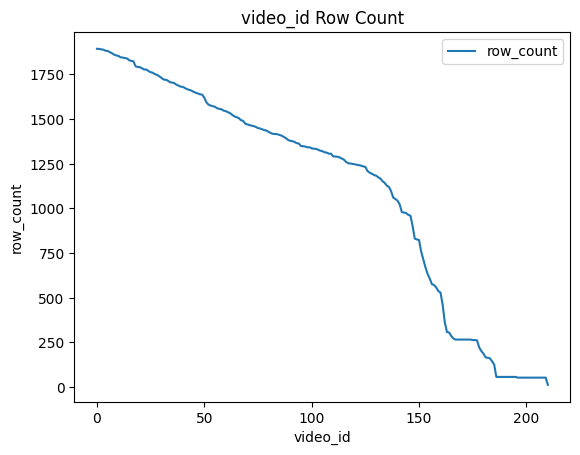

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
video_id_row_count.sort_index().plot(kind = 'line')
plt.title('video_id Row Count')
plt.xlabel('video_id')
plt.ylabel('row_count')
plt.show()

On second thought, create a function to add a flag that indicates if there is continuity in the days.

Purpose: If a video_id has many non-continuous days, would consider to remove from training. If a video_id has a few non-continuous days, to handle these separately. Perhaps impute the missing days based on data of day(s) before and day(s) after?

Code: If 'day' == 'next_day', return True. If 'day' is the latest day for a given video_id, return True. Else, return False.

In [8]:
def check_continuous_day(df):
    df['day'] = pd.to_datetime(df['day'], errors = 'coerce')
    df = df.sort_values(by = ['video_id', 'day'])
    df['next_day'] = df.groupby('video_id')['day'].shift(-1)
    df['continuous_day_flag'] = (df['day'] + pd.Timedelta(days = 1)) == df['next_day']
    latest_day = df.groupby('video_id')['day'].transform('max')
    df['continuous_day_flag'] = (df['continuous_day_flag']) | (df['day'] == latest_day)
    return df

In [9]:
video_id_day = train_data.loc[:, ['video_id', 'day']]
continuous_day_map = check_continuous_day(video_id_day)

In [10]:
continuous_day_map.info()

<class 'pandas.core.frame.DataFrame'>
Index: 234889 entries, 10877 to 234728
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   video_id             234889 non-null  object        
 1   day                  234889 non-null  datetime64[ns]
 2   next_day             234678 non-null  datetime64[ns]
 3   continuous_day_flag  234889 non-null  bool          
dtypes: bool(1), datetime64[ns](2), object(1)
memory usage: 7.4+ MB


Create dataframe containing video_id, and continuous_flag_count (the number of rows in the training data that is continuous in days)

In [11]:
video_id_continuous_day_count = continuous_day_map[['video_id', 'continuous_day_flag']].value_counts().reset_index()
video_id_continuous_day_count.columns = ['video_id', 'continuous_day_flag', 'continuous_flag_count']
video_id_continuous_day_count.head(250)

,video_id,continuous_day_flag,continuous_flag_count
0,YuQaT52VEwo,True,1893
1,SfTEVOQP-Hk,True,1892
2,bN7jBc95XDo,True,1890
3,V1YwVETqB2c,True,1888
4,WRD9aHXC89I,True,1882
...,...,...,...
206,YJblVH2YcpE,True,53
207,9N-WTN4L0p4,True,53
208,8s9Z7JQ1Svg,True,53
209,pWKKxy4xyok,True,53


In [12]:
# Join tables with row_count and continuous_flag_count.
video_id_row_count_continuous_day_count = pd.merge(video_id_row_count, video_id_continuous_day_count, on = 'video_id', how = 'left')
video_id_row_count_continuous_day_count

,video_id,row_count,continuous_day_flag,continuous_flag_count
0,YuQaT52VEwo,1893,True,1893
1,SfTEVOQP-Hk,1892,True,1892
2,bN7jBc95XDo,1890,True,1890
3,V1YwVETqB2c,1888,True,1888
4,WRD9aHXC89I,1882,True,1882
...,...,...,...,...
206,wozpFePfflk,53,True,53
207,2F5RxV5fH1M,53,True,53
208,7wydjX4ZFM0,53,True,53
209,YJblVH2YcpE,53,True,53


In [13]:
matching_count = video_id_row_count_continuous_day_count[video_id_row_count_continuous_day_count['row_count'] == video_id_row_count_continuous_day_count['continuous_flag_count']]['video_id'].nunique()
non_matching_count = video_id_row_count_continuous_day_count[video_id_row_count_continuous_day_count['row_count'] != video_id_row_count_continuous_day_count['continuous_flag_count']]['video_id'].nunique()
matching_count_summary = pd.DataFrame({
    'Condition': ['row_count = continuous_flag_count', 'row_count != continuous_flag_count'],
    'video_id Count': [matching_count, non_matching_count]
})
matching_count_summary

,Condition,video_id Count
0,row_count = continuous_flag_count,211
1,row_count != continuous_flag_count,0


Turns out, all video_id have row_count = continuous_flag_count. Cool.

Some video_ids have 1.8k+ rows of data, while others have only 50+. Now, to determine the cut-off point for video_ids that have low number of rows. Thoughts:
1. Approach: Manually set cut-off point of 100 rows as a start. Those with fewer than 100 rows to be used as test data.
2. (for later) The cut-off point could be a parameter to be fine-tuned.

In [14]:
# Manually set cut-off point at 100
cut_off_point = 100
train_video_id = video_id_row_count_continuous_day_count['video_id'][video_id_row_count_continuous_day_count['row_count'] >= cut_off_point]
test_video_id = video_id_row_count_continuous_day_count['video_id'][video_id_row_count_continuous_day_count['row_count'] < cut_off_point]

train_data_above_cut_off_point = train_data[train_data['video_id'].isin(train_video_id)]
test_data = train_data[train_data['video_id'].isin(test_video_id)]


# Add a column (running_day_count) to assign sequential day numbers (starting from 0) for each video
train_data_above_cut_off_sorted = train_data_above_cut_off_point.sort_values(by = ['video_id', 'day'])
train_data_above_cut_off_sorted['running_day_count'] = train_data_above_cut_off_sorted.groupby('video_id').cumcount()

test_data_sorted = test_data.sort_values(by = ['video_id', 'day'])
test_data_sorted['running_day_count'] = test_data_sorted.groupby('video_id').cumcount()

In [15]:
train_data_above_cut_off_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233564 entries, 10877 to 234728
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   video_id                        233564 non-null  object 
 1   day                             233564 non-null  object 
 2   views                           233564 non-null  float64
 3   redViews                        233564 non-null  float64
 4   comments                        233564 non-null  float64
 5   likes                           233564 non-null  float64
 6   dislikes                        233564 non-null  float64
 7   videosAddedToPlaylists          233564 non-null  float64
 8   videosRemovedFromPlaylists      233564 non-null  float64
 9   shares                          233564 non-null  float64
 10  estimatedMinutesWatched         233564 non-null  float64
 11  estimatedRedMinutesWatched      233564 non-null  float64
 12  averageViewDurati

Plotting a line chart to see views, likes, and shares of a random video_id from train_data_above_cut_off_point

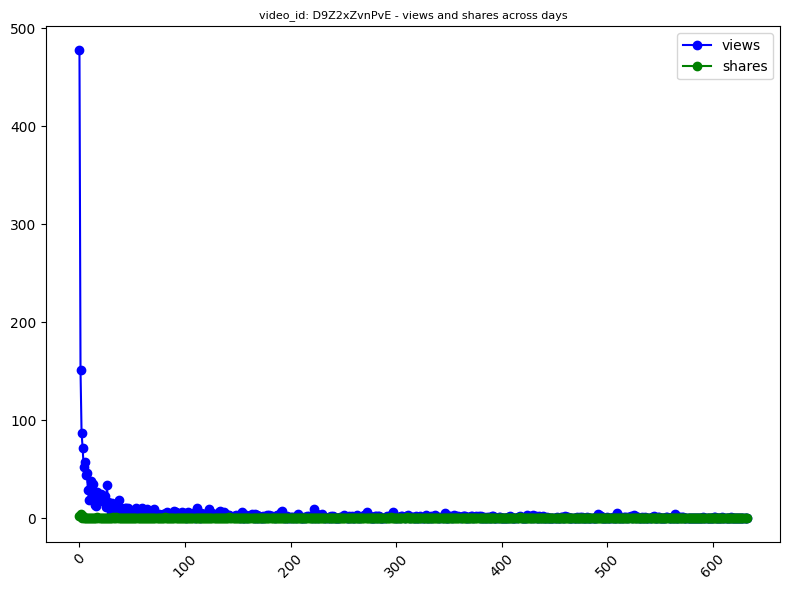

In [16]:
sample_id = train_data_above_cut_off_sorted['video_id'].sample(n=1).iloc[0]
sample_train_data = train_data_above_cut_off_sorted[train_data_above_cut_off_sorted['video_id'] == sample_id].sort_values(by = 'running_day_count')
# sample_train_data = sample_train_data.head(len(sample_train_data) // 2)
plt.figure(figsize=(8,6))
plt.plot(sample_train_data['running_day_count'], sample_train_data['views'], label='views', color='b', marker='o')
plt.plot(sample_train_data['running_day_count'], sample_train_data['shares'], label='shares', color='g', marker='o')
plt.title('video_id: ' + str(sample_id) + ' - views and shares across days', fontsize = 8)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

Before adding some additional columns that may be useful to analyze impact of "Share" on "Views", to also explore correlations between features present in original dataset.

**Approach:** To aggregate the statistics for each video_id's first 100 days (cut_off_point), then look for insights via a correlation matrix.

In [17]:
agg_func1 = 'sum'
agg_func2 = 'mean'
agg_func3 = 'max'
agg_func4 = 'min'
agg_func5 = 'count'
train_data_above_cut_off_sorted = train_data_above_cut_off_sorted.sort_values(by = ['video_id', 'running_day_count'])
train_data_above_cut_off_first_100_days = train_data_above_cut_off_sorted.groupby('video_id').head(cut_off_point)
train_data_agg_first_100_days = train_data_above_cut_off_first_100_days.groupby('running_day_count').agg({
    'video_id': agg_func5,
    'views': [agg_func1, agg_func3, agg_func4],
    'redViews': [agg_func1, agg_func3, agg_func4],
    'comments': [agg_func1, agg_func3, agg_func4],
    'likes': agg_func1,
    'dislikes': agg_func1,
    'videosAddedToPlaylists': agg_func1,
    'videosRemovedFromPlaylists': agg_func1,
    'shares': agg_func1,
    'estimatedMinutesWatched': [agg_func1, agg_func2],
    'estimatedRedMinutesWatched': agg_func1,
    'averageViewDuration': agg_func2,
    'averageViewPercentage': agg_func2,
    'annotationClickThroughRate': agg_func2,
    'annotationCloseRate': agg_func2,
    'annotationImpressions': agg_func1,
    'annotationClickableImpressions': agg_func1,
    'annotationClosableImpressions': agg_func1,
    'annotationClicks': agg_func1,
    'annotationCloses': agg_func1,
    'cardClickRate': agg_func2,
    'cardTeaserClickRate': agg_func2,
    'cardImpressions': agg_func1,
    'cardTeaserImpressions': agg_func1,
    'cardClicks': agg_func1,
    'cardTeaserClicks': agg_func1,
    'subscribersGained': agg_func1,
    'subscribersLost': agg_func1
})
train_data_agg_first_100_days.columns = ['_'.join(col).strip() for col in train_data_agg_first_100_days.columns]

In [18]:
train_data_agg_first_100_days.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   video_id_count                      100 non-null    int64  
 1   views_sum                           100 non-null    float64
 2   views_max                           100 non-null    float64
 3   views_min                           100 non-null    float64
 4   redViews_sum                        100 non-null    float64
 5   redViews_max                        100 non-null    float64
 6   redViews_min                        100 non-null    float64
 7   comments_sum                        100 non-null    float64
 8   comments_max                        100 non-null    float64
 9   comments_min                        100 non-null    float64
 10  likes_sum                           100 non-null    float64
 11  dislikes_sum                        100 non-null   

In [19]:
# Create a correlation matrix. Method of correlation is the Kendall Tau correlation coefficient (instead of Pearson, which assumes linearity)
corr_matrix = train_data_agg_first_100_days.corr(method = 'kendall')

In [20]:
# Correlation matrix for views_sum
corr_matrix['views_sum'].sort_values(ascending = False)

views_sum                             1.000000
redViews_sum                          0.882377
likes_sum                             0.873686
videosAddedToPlaylists_sum            0.867895
estimatedMinutesWatched_mean          0.864128
estimatedMinutesWatched_sum           0.864128
subscribersGained_sum                 0.842932
cardTeaserImpressions_sum             0.829781
estimatedRedMinutesWatched_sum        0.820083
shares_sum                            0.811516
videosRemovedFromPlaylists_sum        0.754022
comments_sum                          0.687451
dislikes_sum                          0.620045
cardTeaserClicks_sum                  0.550764
cardImpressions_sum                   0.549155
subscribersLost_sum                   0.492599
comments_max                          0.482013
averageViewPercentage_mean            0.317002
views_min                             0.266632
cardClicks_sum                        0.197215
cardClickRate_mean                    0.118771
cardTeaserCli

In [21]:
# Correlation matrix for shares_sum
corr_matrix['shares_sum'].sort_values(ascending = False)

shares_sum                            1.000000
views_sum                             0.811516
likes_sum                             0.789442
cardTeaserImpressions_sum             0.777590
subscribersGained_sum                 0.775380
videosAddedToPlaylists_sum            0.773134
redViews_sum                          0.772758
estimatedMinutesWatched_mean          0.762594
estimatedMinutesWatched_sum           0.762594
estimatedRedMinutesWatched_sum        0.758946
videosRemovedFromPlaylists_sum        0.725756
comments_sum                          0.662455
dislikes_sum                          0.607590
cardTeaserClicks_sum                  0.552650
cardImpressions_sum                   0.534656
subscribersLost_sum                   0.482650
comments_max                          0.470536
averageViewPercentage_mean            0.305808
views_min                             0.267444
cardClicks_sum                        0.186839
cardClickRate_mean                    0.127090
cardTeaserCli

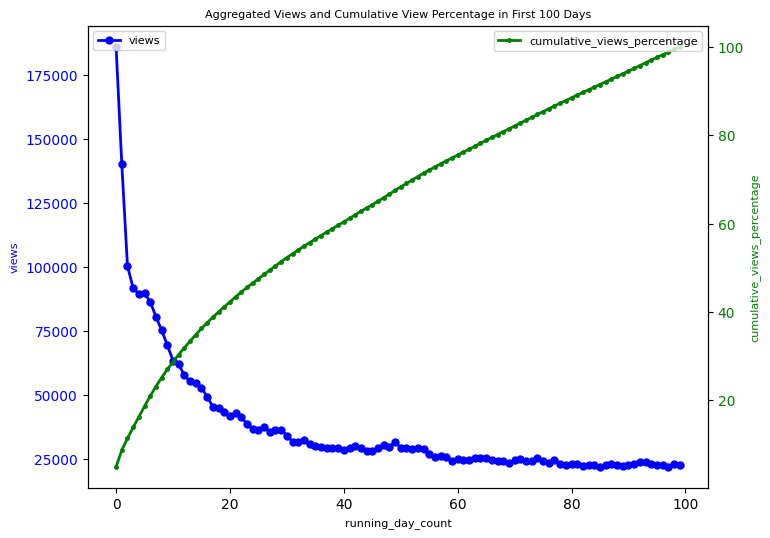

In [22]:
total_views = train_data_agg_first_100_days["views_sum"].sum()
train_data_agg_first_100_days["cumulative_views"] = train_data_agg_first_100_days["views_sum"].cumsum()
train_data_agg_first_100_days["cumulative_views_percentage"] = train_data_agg_first_100_days["cumulative_views"] / total_views * 100

# Create the first subplot, for views
fig, ax1 = plt.subplots(figsize=(8,6))
line1, = ax1.plot(train_data_agg_first_100_days.index, train_data_agg_first_100_days['views_sum'], label='views', color='b', marker='o', markersize = 5, linestyle = '-', linewidth = 2)
ax1.set_xlabel('running_day_count', fontsize = 8)
ax1.set_ylabel('views', fontsize = 8, color = 'b')
ax1.tick_params(axis = 'y', labelcolor = 'b')

# Create a second y-axis (ax2) that shares the same x-axis (ax1)
ax2 = ax1.twinx()

# Create thes econd subplot, for cumulative_views_percentage
line2, = ax2.plot(train_data_agg_first_100_days.index, train_data_agg_first_100_days['cumulative_views_percentage'], label='views', color='g', marker='.', markersize = 5, linestyle = '-', linewidth = 2)
ax2.set_ylabel('cumulative_views_percentage', fontsize = 8, color = 'g')
ax2.tick_params(axis = 'y', labelcolor = 'g')

# Adding some other cosmetics to the plot
plt.title('Aggregated Views and Cumulative View Percentage in First 100 Days', fontsize = 8)
plt.xticks(rotation=45, fontsize = 8)
ax1.legend(handles = [line1], labels = ['views'], loc = 'upper left', fontsize = 8)
ax2.legend(handles = [line2], labels = ['cumulative_views_percentage'], loc = 'upper right', fontsize = 8)
plt.show()

# plt.grid(True)
# ax1.legend(labels = 'views', loc = 'upper left', fontsize = 8)
# ax2.legend(labels = 'cumulative_views_percentage', loc = 'upper right', fontsize = 8)
# plt.tight_layout()  # Adjust layout to prevent clipping

Running the code cell above a few times, we see that there are different shapes of the views curve (right-skewed, sinusoidal etc.). It would help to add a tag to each video_id, to enhance accuracy of analysis/prediction.

We'll start with an aggregated approach, using a function to determine the number of days for videos' views (from an aggregate standpoint) to taper off.

More thoughts and assumptions:
* For videos with views that follow a right-skewed distribution, the function we define would be more useful.
* The positive skew assumption is significant for this function. For videos that have a resurgence of views (leading to multimodal distributions; more than one mode), or follow a sinusoidal distribution, this function would be less effective.

In [23]:
def taper_off_point(df, metric, threshold_percentage):
    df = df.sort_values(by = 'running_day_count')
    metric_total = df[metric].sum()
    df['metric_cumulative_sum'] = df[metric].cumsum()
    taper_off_day = df[(df['metric_cumulative_sum'] / metric_total) > threshold_percentage].index.min()
    if pd.isna(taper_off_day):
        return None
    return taper_off_day

print("views_sum - Number of days before going above 80%: \n" + str(taper_off_point(train_data_agg_first_100_days, 'views_sum', 0.8)))

print("shares_sum - Number of days before going above 80%: \n" + str(taper_off_point(train_data_agg_first_100_days, 'shares_sum', 0.8)))

print("shares_sum - Number of days before going above 80%: \n" + str(taper_off_point(train_data_agg_first_100_days, 'likes_sum', 0.8)))

views_sum - Number of days before going above 80%: 
67
shares_sum - Number of days before going above 80%: 
57
shares_sum - Number of days before going above 80%: 
55


# Analytics approach